***
## 2. DATA UNDERSTANDING
***
The data used in this project was sourced from [YELP](https://www.yelp.com/dataset/download). It is a collective dataset of various businesses and user information gotten from Yelp's website. It contains 6,990,280 reviews, 150,346 businesses, 200,100 pictures across 11 metropolitan areas. 
The original data was filtered by concentrating only on restaurant businesses and on reviews made within the year and split into two datasets a shown 
[here](Preliminary_notebook.ipynb).

The two datasets have information on 
> 1. Restaurant Informational Data
> 2. User Review Data

Data Understanding on the two datasets are as follows::


In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from understanding import DataLoader, DataChecks, DataInfo
from IPython.display import display, HTML

#### i) Restaurant Informational Data

In [2]:
# Instantiate the DataLoader class
loader= DataLoader()

# Instantiate the DataInfo class
summary= DataInfo()

In [3]:
# Reading the restaurants csv file
restaurant_data= loader.read_data("data/restaurants.csv")

# Summary information on the restaurant df
print(f'\nRESTAURANT DATASET INFORMATION\n' + '=='*20 + '\n')
summary.info(restaurant_data)


RESTAURANT DATASET INFORMATION

Shape of the dataset : (52286, 14) 

Column Names
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object') 
 

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52286 non-null  object 
 1   name          52286 non-null  object 
 2   address       51843 non-null  object 
 3   city          52286 non-null  object 
 4   state         52286 non-null  object 
 5   postal_code   52265 non-null  object 
 6   latitude      52286 non-null  float64
 7   longitude     52286 non-null  float64
 8   stars         52286 non-null  float64
 9   review_count  52286 non-null  int64  
 10  is_open       52286 non-null  int64  
 11  attributes    51720

,latitude,longitude,stars,review_count,is_open
count,52286.000000,52286.000000,52286.000000,52286.000000,52286.000000
mean,36.997663,-87.845038,3.515234,87.241078,0.669472
std,6.010943,13.813532,0.829585,188.912445,0.470408
min,27.564457,-120.083748,1.000000,5.000000,0.000000
25%,32.217586,-90.233506,3.000000,13.000000,0.000000
50%,39.484140,-86.035621,3.500000,33.000000,1.000000
75%,39.958370,-75.337533,4.000000,89.000000,1.000000
max,53.679197,-74.664459,5.000000,7568.000000,1.000000


Dataset Overview


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr...",NaN


### Restaurant Dataset Column Descriptions
***

| Column Name     | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| business_id     | Unique identifier for the business.                                         |
| name            | Name of the business.                                                       |
| address         | Street address of the business.                                             |
| city            | City where the business is located.                                         |
| state           | State where the business is located.                                        |
| postal_code     | Postal code (ZIP code) of the business location.                            |
| latitude        | Latitude coordinate of the business location.                               |
| longitude       | Longitude coordinate of the business location.                              |
| stars           | Average star rating of the (typically on a scale of 1 to 5).       |
| review_count    | Number of reviews the business has received.                                |
| is_open         | Indicator of whether the business is currently open (1 = open, 0 = closed). |
| attributes      | Additional attributes of the business (e.g., "WiFi: free", "HasTV: true").  |
| categories      | List of categories the business belongs to (e.g., "Restaurants", "Bars").   |
| hours           | Business hours (e.g., "Monday: 8am-5pm, Tuesday: 8am-5pm").                 |


In [4]:
# Instantiating Datachecks for restaurant df
checks= DataChecks(restaurant_data)

# Checking for duplicates
checks.check_duplicates()

NO DUPLICATES FOUND


In [5]:
# Checking for null values in restaurant dataset
checks.check_missing()

,Column Names,Missing Values,Percentage Missing
0,address,443,0.847263
1,postal_code,21,0.040164
2,attributes,566,1.082508
3,hours,7279,13.921509


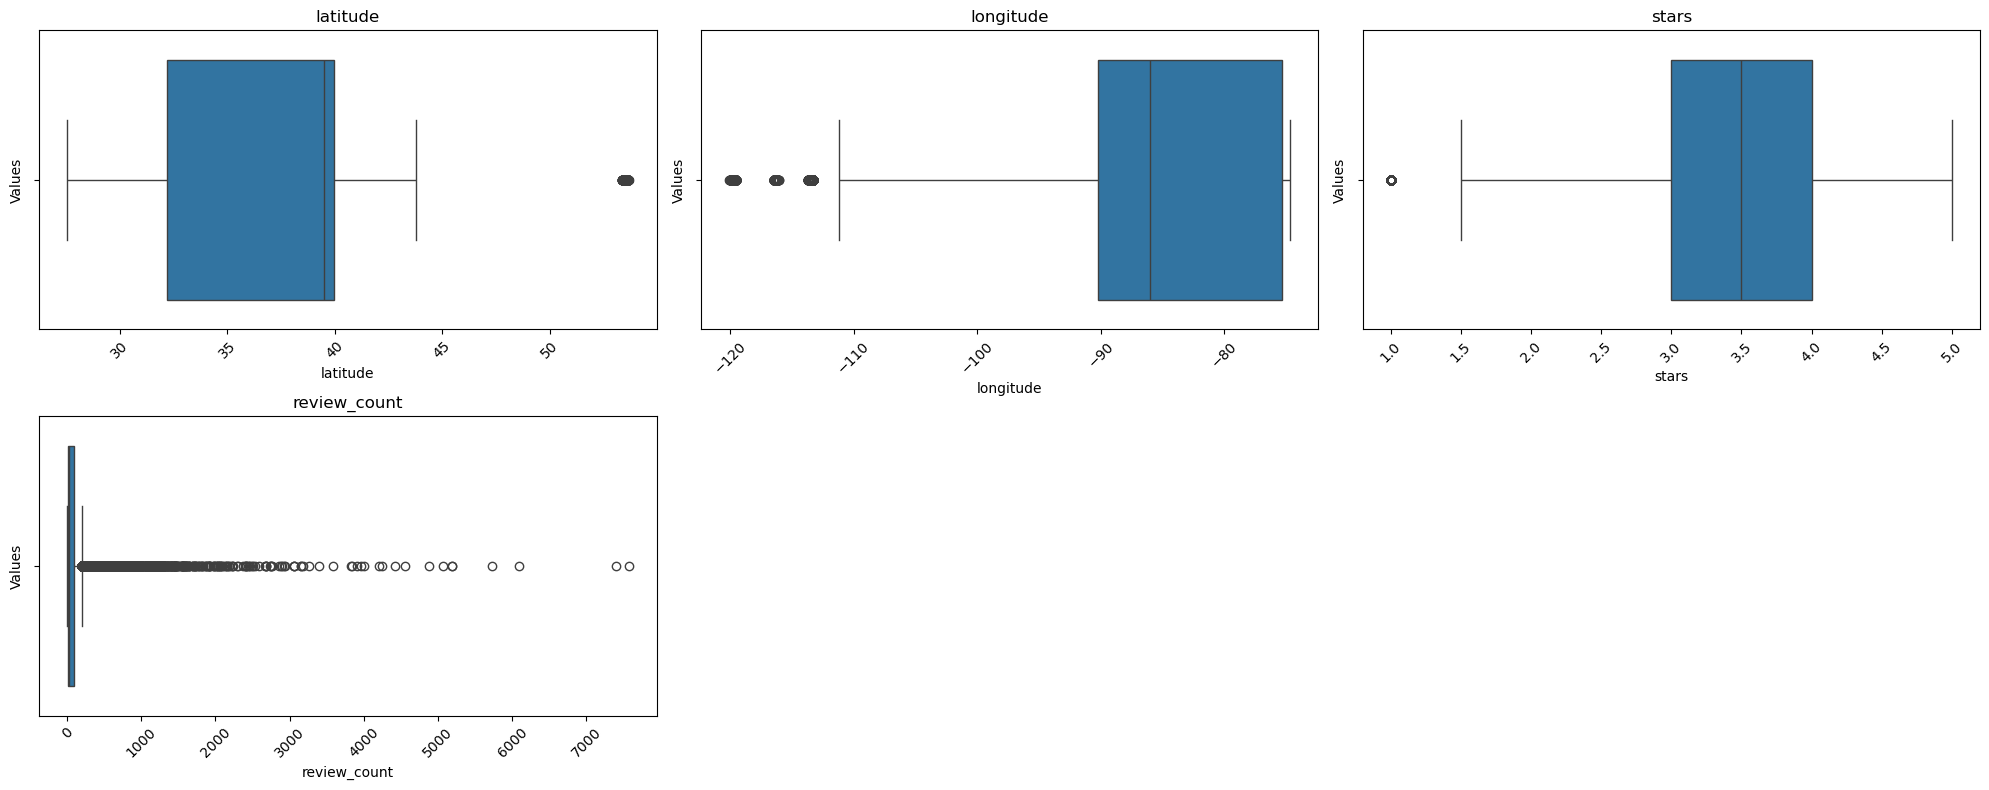

In [6]:
# check for outliers in restaurant dataset
checks.check_outliers_and_plot()

***
**Initial Observations on restaurant information data**
***
- > Restaurant information dataset has 52286 rows and 14 columns.
- > All business locations are in the North West hemisphere i.e. USA based on min and max latitude and longitude.
- > The address, 	postalcode, attributes and hours columns contain missing values and will be addressed.
- > There are no duplicated rows.
- > Majority of the businesses receive between 3-4 stars on average.
- > No significant outliers can be seen.urs


#### ii) User Review Data

In [7]:
# Loading the users csv file
users_data= loader.read_data("data/users.csv")

# Summary information on the user review data
print(f'\nUSER DATASET INFORMATION\n' + '=='*20 + '\n')
summary.info(users_data)


USER DATASET INFORMATION

Shape of the dataset : (429771, 9) 

Column Names
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object') 
 

Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429771 entries, 0 to 429770
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    429771 non-null  object
 1   user_id      429771 non-null  object
 2   business_id  429771 non-null  object
 3   stars        429771 non-null  int64 
 4   useful       429771 non-null  int64 
 5   funny        429771 non-null  int64 
 6   cool         429771 non-null  int64 
 7   text         429771 non-null  object
 8   date         429771 non-null  object
dtypes: int64(4), object(5)
memory usage: 29.5+ MB

Descriptive Statistics


,stars,useful,funny,cool
count,429771.000000,429771.000000,429771.000000,429771.000000
mean,3.820449,0.822806,0.212450,0.487885
std,1.513978,2.818655,1.231838,2.382432
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,261.000000,101.000000,164.000000


Dataset Overview


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
2,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45


### Users Reviews Dataset Column Descriptions
***
| Column Name  | Description                                                                 |
|--------------|-----------------------------------------------------------------------------|
| review_id    | Unique identifier for the review.                                           |
| user_id      | Unique identifier for the user who wrote the review.                        |
| business_id  | Unique identifier for the business that the review is associated with.      |
| stars        | Star rating given by the user in the review (on a scale of 1 to 5).         |
| useful       | Count of how many users found the review useful.                            |
| funny        | Count of how many users found the review funny.                             |
| cool         | Count of how many users found the review cool.                              |
| text         | The content of the review written by the user.                              |
| date         | Date when the review was written.                                           |


In [8]:
# Instantiating Datachecks for users df
checks= DataChecks(users_data)

# Checking for duplicates for users df
checks.check_duplicates()

NO DUPLICATES FOUND


In [9]:
# Checking for null values in users df
checks.check_missing()

NO NULL VALUES FOUND


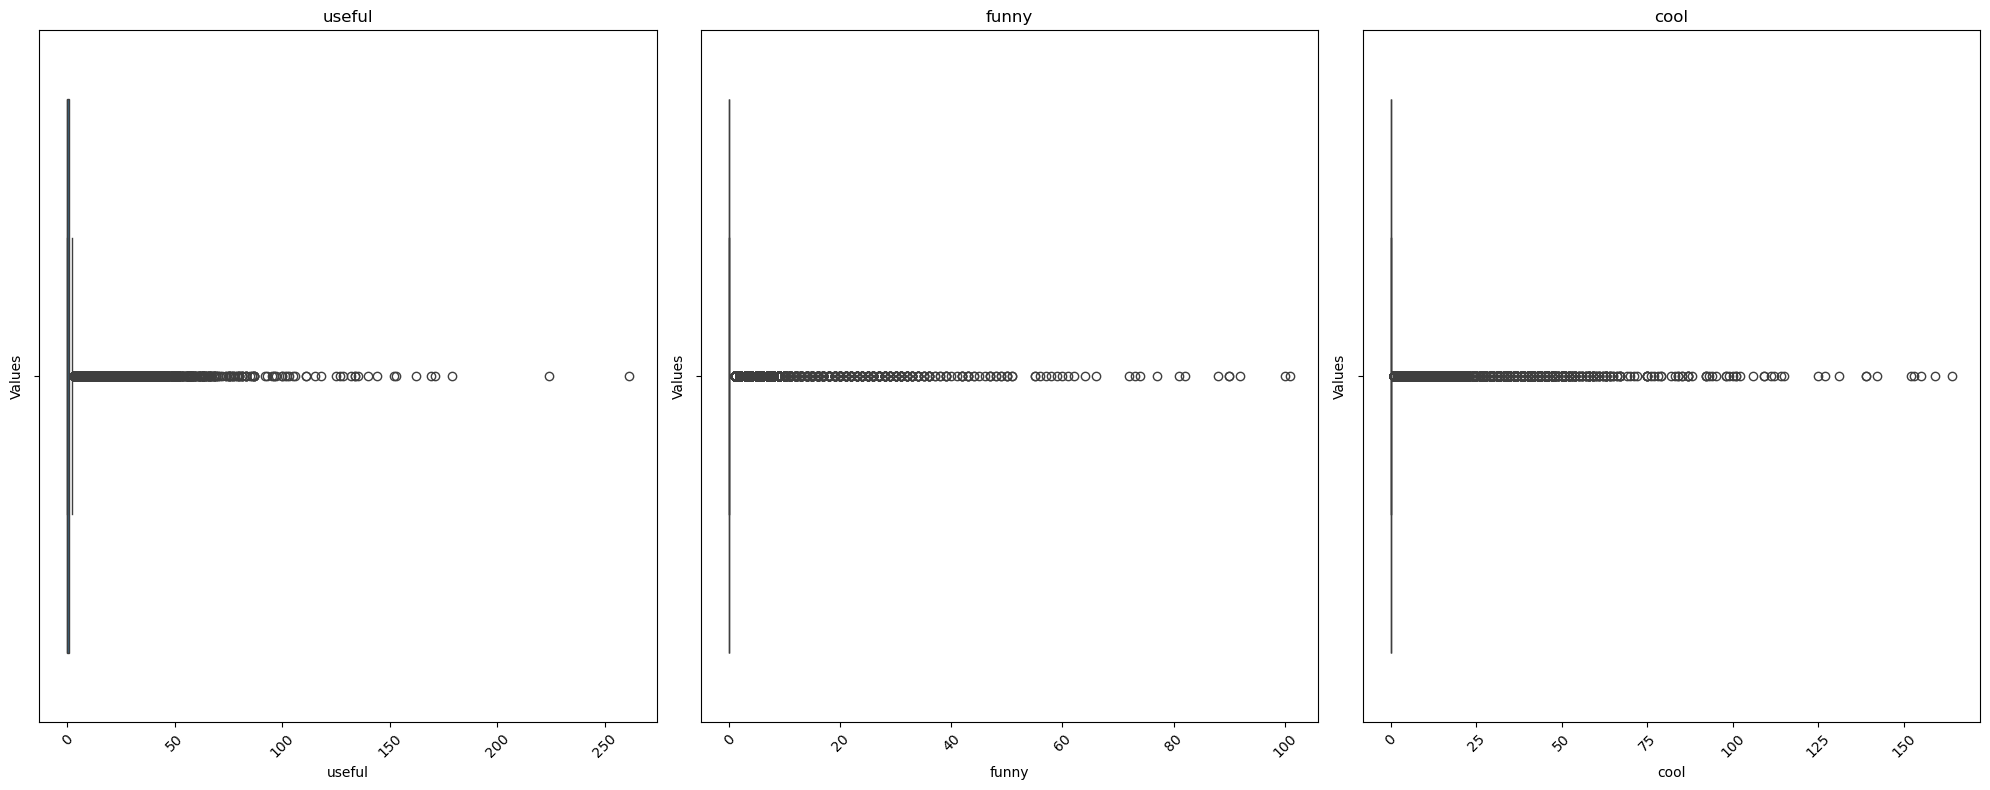

In [10]:
# check for outliers in users df
checks.check_outliers_and_plot()

***
**Initial Observations on user review data**
***
> The user review dataset contains 429771 rows and 9 columns

> There are no duplicates

> There are no null values in the dataset.

> Majority of users rate restaurants between 3 and 4 stars

> useful, funny and cool columns do not seem to show any relevant information


***
#### EXPLORATORY DATA ANALYSIS
***

In [11]:

import sys
import os
sys.path.append(os.path.abspath('EDA'))
restaurants_df = pd.read_csv('data/restaurants.csv')
from EDA import ComprehensiveEDA, UnivariateAnalysis, MultivariateAnalysis, SpecificAttributeVisualizations, GeographicalAndOperationalInsights

eda = ComprehensiveEDA(restaurants_df)



In [12]:
univariate_eda = UnivariateAnalysis(restaurants_df)

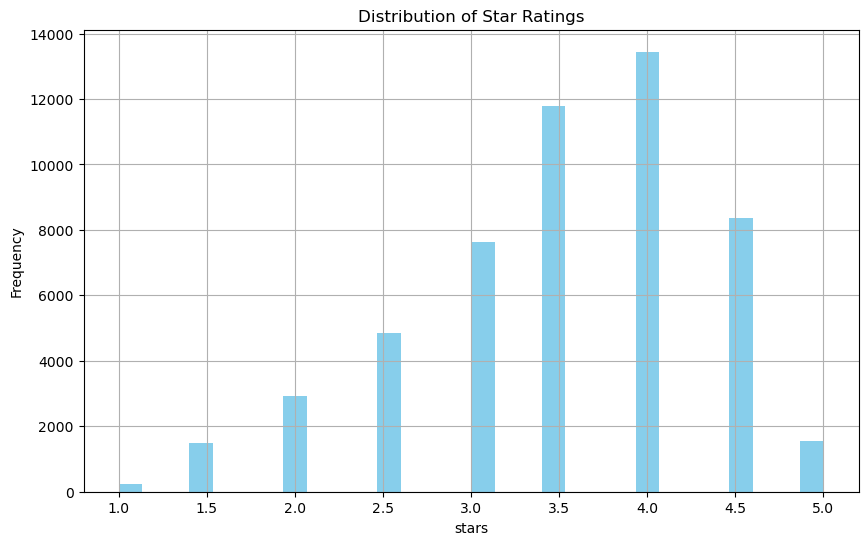

In [13]:
univariate_eda.plot_histogram('stars', 'Distribution of Star Ratings')

Most common ratings are 4.0 and 3.5 stars, indicating general satisfaction.

Ratings below 2.5 stars are uncommon, showing few very poor experiences.



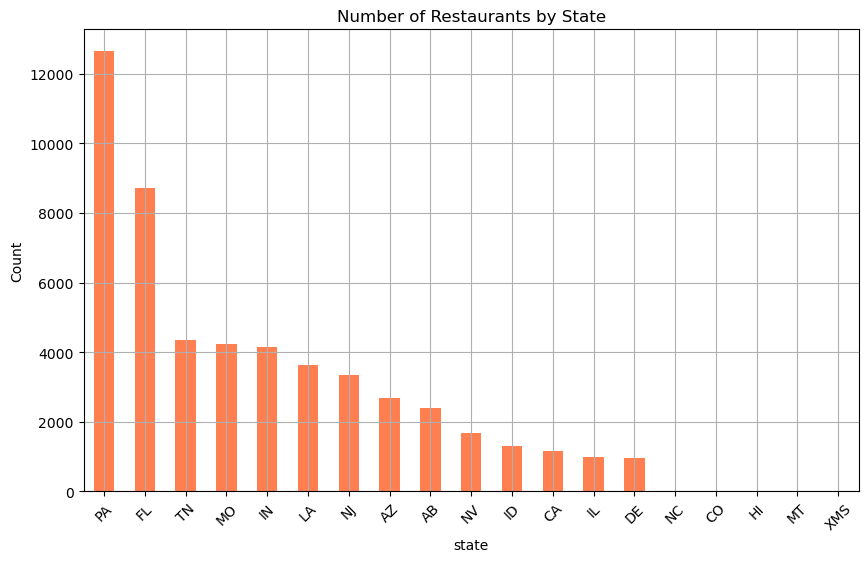

In [14]:
univariate_eda.plot_bar_chart('state', 'Number of Restaurants by State') 


 PA and FL have the highest numbers of restaurants, indicating major markets.
 
 There is a noticeable decrease in restaurant counts moving from left to right in the graph, showing lower market saturation in states like NC, CO, HI, and MT.



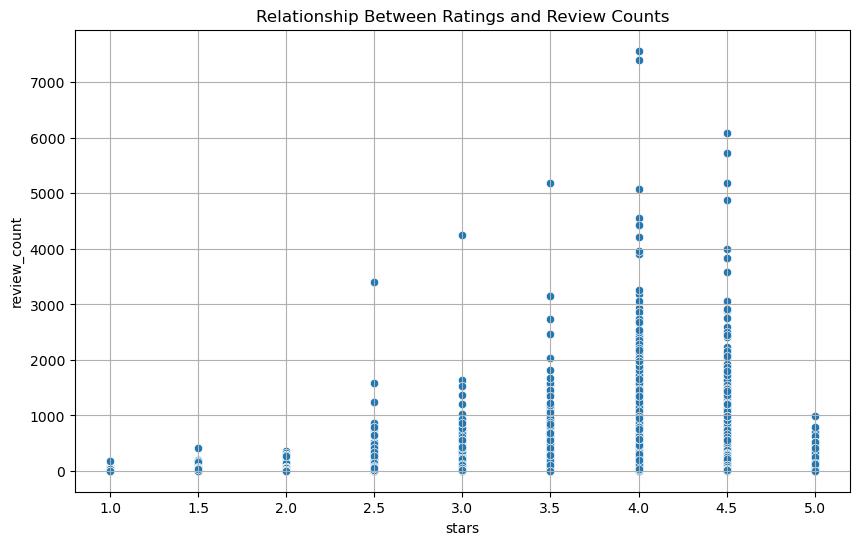

In [15]:
multivariate_eda = MultivariateAnalysis(restaurants_df)
multivariate_eda.plot_scatter('stars', 'review_count', 'Relationship Between Ratings and Review Counts')  

 Higher review counts are more commonly associated with mid to high ratings (3.0 to 5.0 stars).
The highest review counts appear at 4.0 and 5.0 star ratings, suggesting high customer engagement with top-rated restaurants.
Restaurants with ratings between 1.0 and 2.5 stars tend to have fewer reviews, indicating less engagement or fewer customers.
The vertical spread at each rating level, especially at high ratings, indicates variability in the popularity of restaurants with similar ratings.


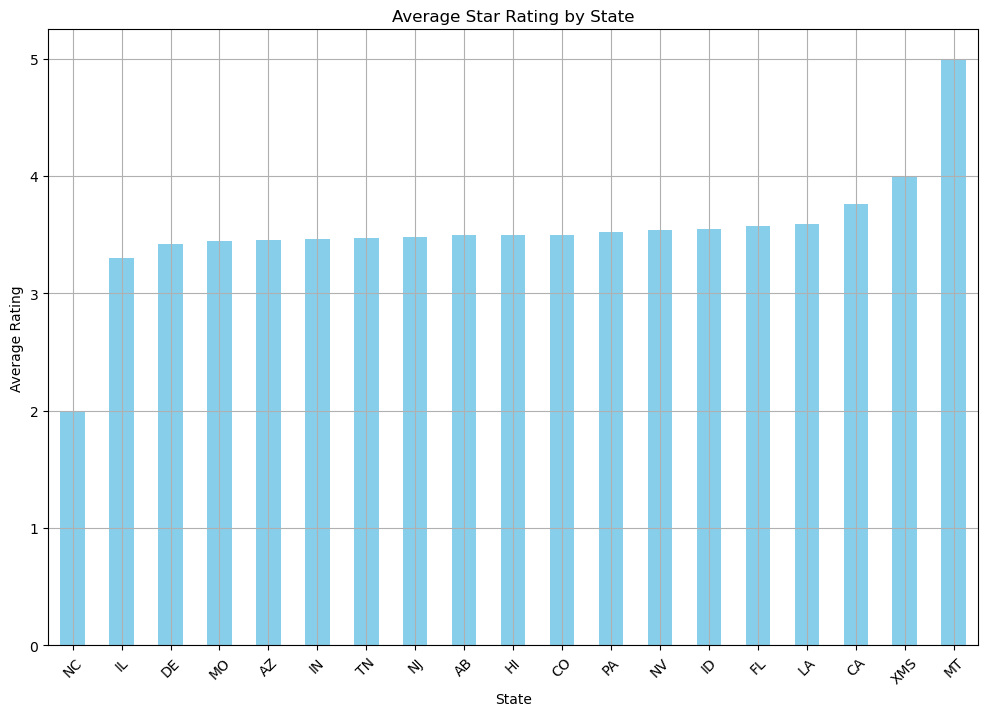

In [17]:
specific_attr_eda = SpecificAttributeVisualizations(restaurants_df)
specific_attr_eda.plot_avg_rating_by_state()  

Most states exhibit average ratings between 3.5 and 4.5 stars, suggesting overall good quality across restaurants.
States like MT and MS have average ratings closer to 5, indicating exceptionally high customer satisfaction.
 Minimal variability in average ratings across most states suggests a homogenous perception of quality among customers nationwide.


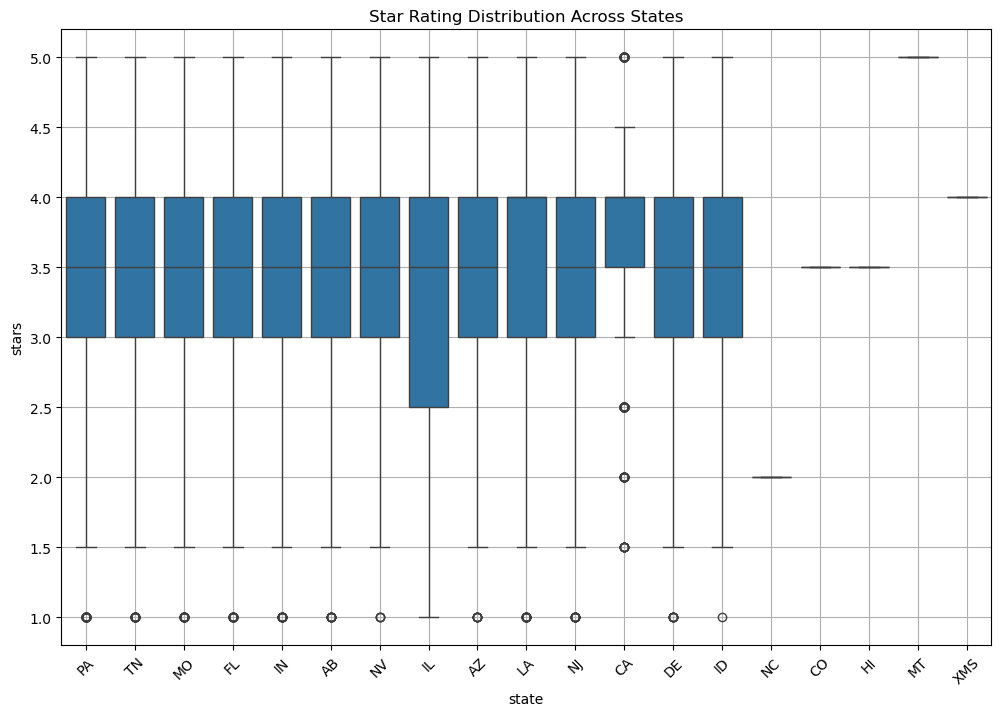

In [18]:
specific_attr_eda.plot_rating_distribution_by_state()

 The majority of states maintain a central tendency around 4.0 stars, indicating a strong level of satisfaction across various regions.
 
 States like CO, HI, and MT show a tight distribution with little variance, suggesting consistent customer experiences within those states.


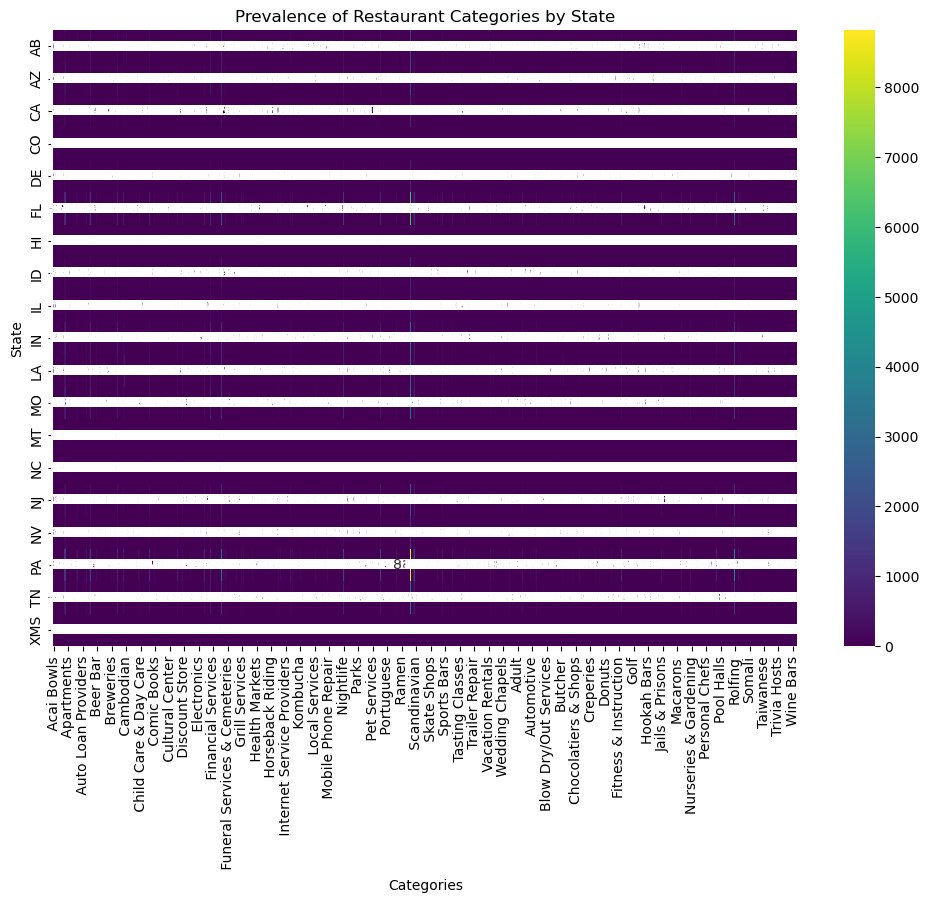

In [32]:
specific_attr_eda.plot_category_heatmap()

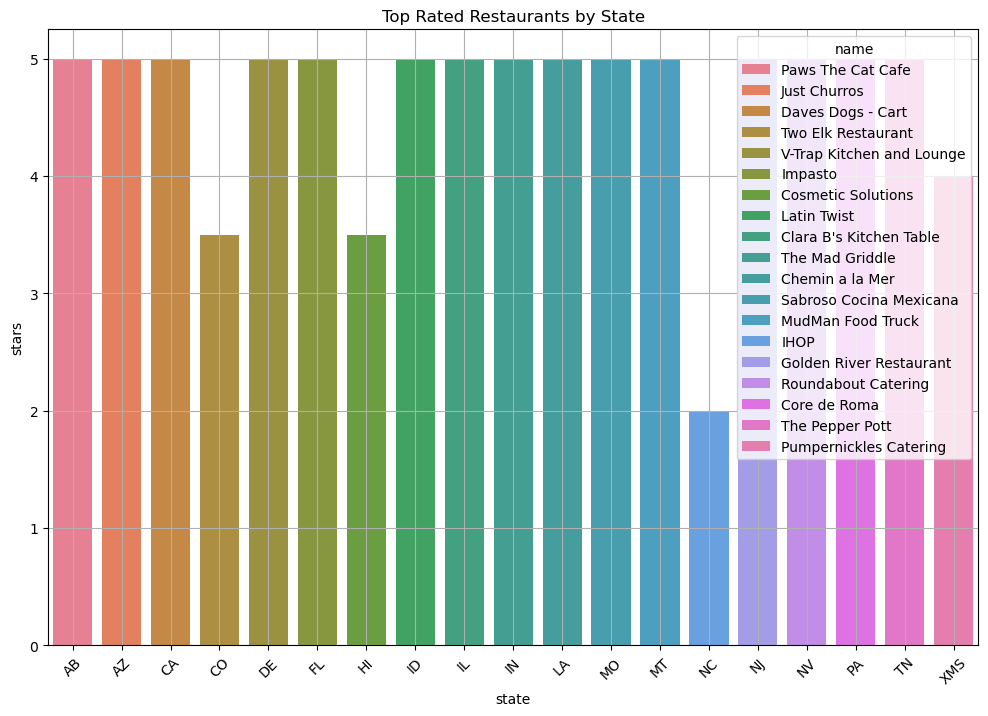

In [25]:
specific_attr_eda.plot_top_rated_restaurants()

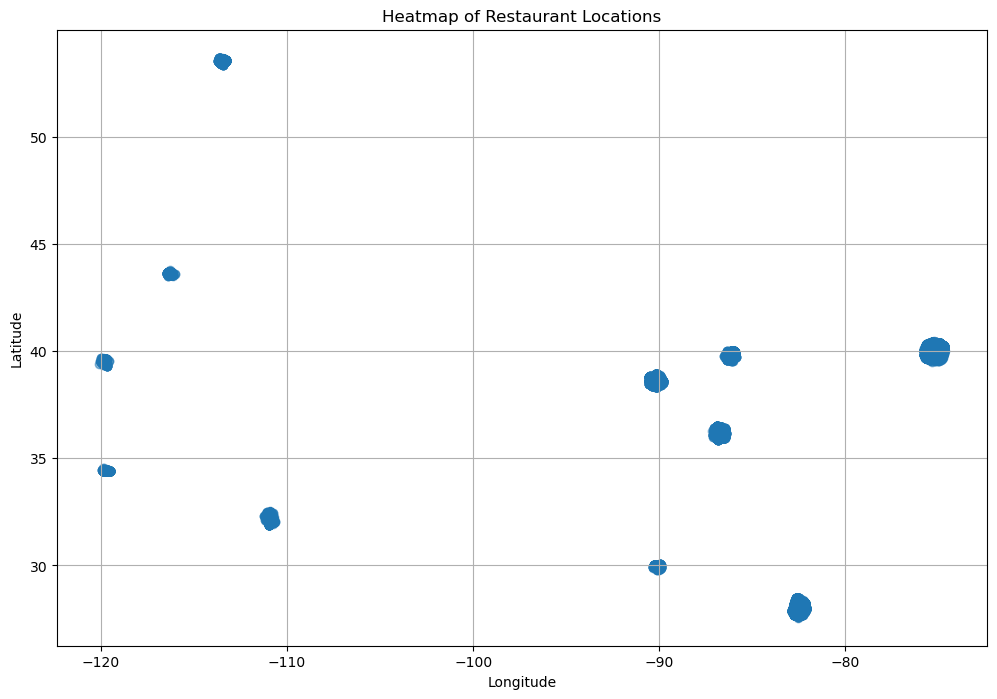

In [19]:
geo_eda = GeographicalAndOperationalInsights(restaurants_df)
geo_eda.plot_geographical_heatmap()

### Observations

The heatmap showcases several key clusters of restaurant locations:

The largest concentrations appear around the longitude lines of approximately -120 (West Coast) and -80 (East Coast), reflecting higher restaurant densities in these areas.

There are noticeable gaps in the central regions, indicating fewer restaurants or less data collected from these areas.

**Strategic Implications**: For our restaurant recommendation system, these visual insights will inform geo-targeted marketing strategies and highlight areas with potential market expansion opportunities.


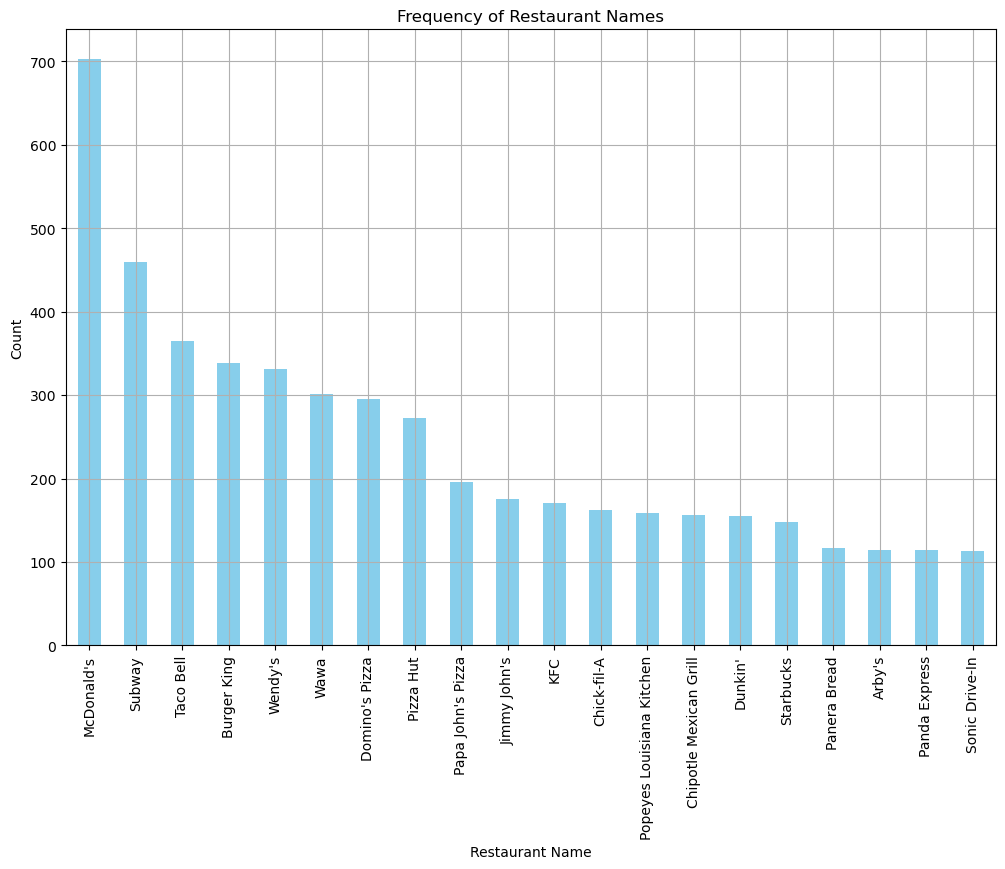

In [20]:
geo_eda.plot_name_histogram()

### Frequency of Restaurant Names

McDonald's, Subway, and Taco Bell lead in frequency, indicating a high presence of these chains within the dataset. This suggests a dominance of fast-food chains in the restaurant landscape.

The frequency of well-known names like Wendy's, Domino's Pizza, and Pizza Hut reflects their popularity, which can be leveraged in recommending familiar choices to users of the recommendation system.

**Strategic Implications**: Understanding which brands are most common can help tailor marketing strategies within the recommendation system, highlighting promotions, deals, or new menu items from these popular chains.


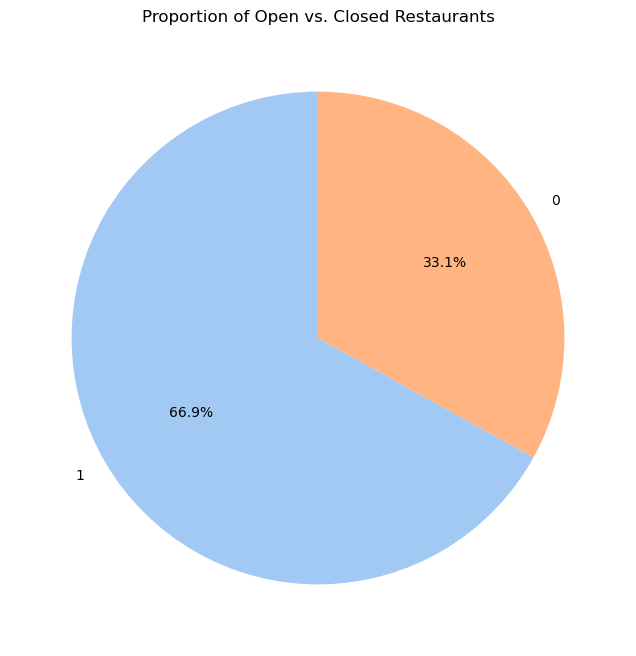

In [29]:

geo_eda.plot_open_vs_closed_pie()

In [7]:

import sys
import os
import pandas as pd


sys.path.append(os.path.abspath('EDA'))


users_df = pd.read_csv('data/users.csv')


from EDA import ComprehensiveEDA, UserEDA


eda_users = ComprehensiveEDA(users_df)
user_eda = UserEDA(users_df)



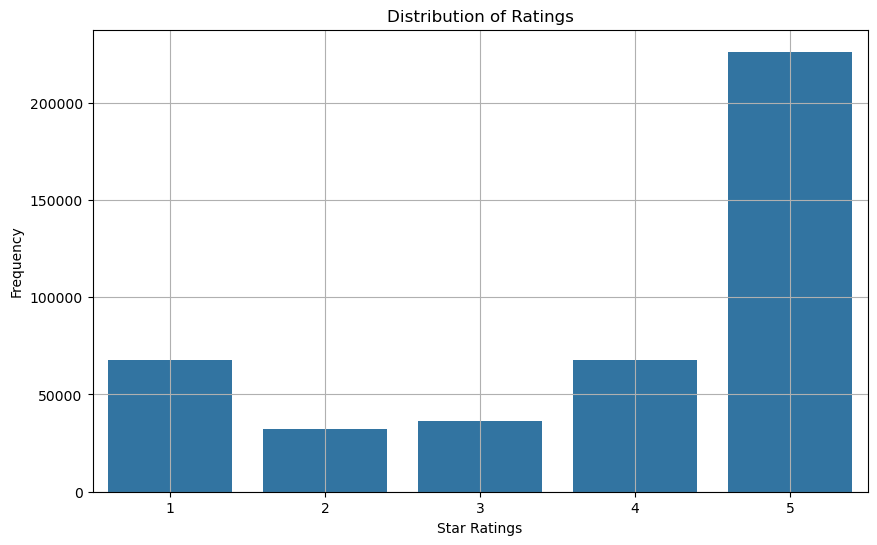

In [8]:
user_eda.plot_rating_distribution()

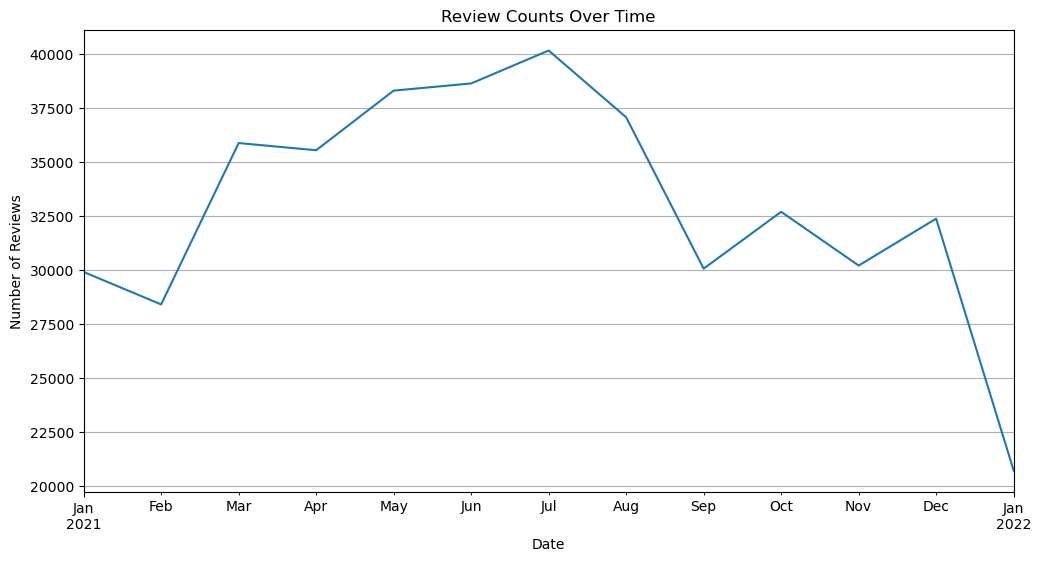

In [9]:
user_eda.plot_reviews_over_time()

### Observations

- **Seasonal Trends**: Review counts peak between April and July, indicating increased customer engagement during this period.
- **Decline in Engagement**: Noticeable drops in reviews occur after July, particularly in September and December.
- **Impact on our Recommender System**:
  - Incorporate seasonality into recommendations.
  - Optimize timing for promotional activities based on review trends.
  - Focus on trending restaurants during high-review periods.


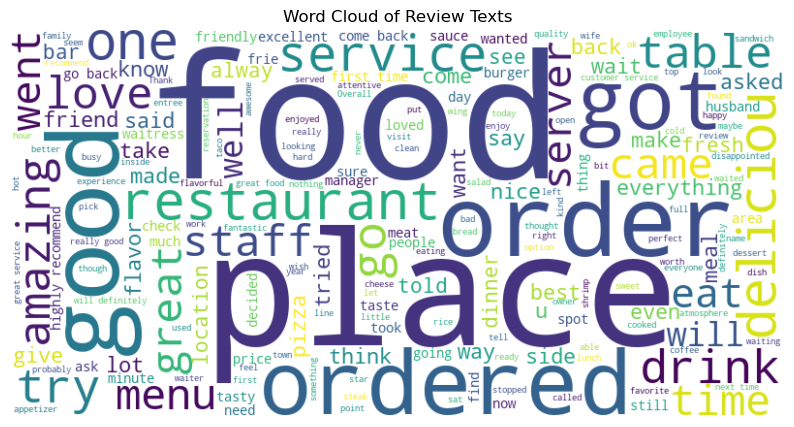

In [11]:
user_eda.plot_wordcloud()
